# Programming Lab 5 - Deep Learning

***

##### CS 434 - Data Mining and Machine Learning

##### Oregon State University-Cascades

***

In [1]:
name = "Tristan Hook"   # <== fill inassert name != ""print(name+'\'s Lab 5 submission')

***

# Load packages 

***

Any additional packages you need for this lab should be added here.
**DO NOT** import packages anywhere else!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import tensorflow_datasets as tfds
from tensorboard.plugins.hparams import api as hp

import itertools
from sklearn.metrics import confusion_matrix

import os

2023-12-11 12:42:24.042207: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 12:42:24.069397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 12:42:24.069417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 12:42:24.070092: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 12:42:24.074550: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#do we have a GPU?
assert len(tf.config.list_physical_devices('GPU')) > 0

2023-12-11 12:42:28.864353: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 12:42:28.903430: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 12:42:28.903581: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

***
# Objective
***

This is an open-ended lab in which you will explore TensorFlow on a problem of your choosing.

1.  Pick a dataset
2.  Build a tensorflow deep learning model
3.  Train and test your model
4.  Analyze your results
5.  Write a report

> **Submission**: run the entire notebook before submission.  I will **not** re-run it to grade.

***
# Data
***

You will find and choose a dataset $^1$ suitable for deep-learning.  Explore the [TensorFlow datasets](https://www.tensorflow.org/datasets/catalog/overview). 

If you wish, you may choose a dataset from a different source (for ideas, start [here](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research), [here](http://deeplearning.net/datasets/), or [here](https://gym.openai.com/)).

$^1$ You may **not** use MNIST, CelebA, or MIT datasets that we used in the Activities.

### Load dataset

# Dataset Choice

All the datasets I gravitated towards ended up being too large to run, even on Collab. I looked at the D4RL robotics sets, stanford_dogs, and a few other fine grained image classification sets.
This pointed me towards image classification, and rock_paper_scissors was the smallest image classification set I found, besides MNIST. With those initial hurdles out of the way, I could get into loading and exploring my chosen dataset.

In [3]:
# load your dataset
data = "rock_paper_scissors"
info = tfds.builder(data).info
(ds_train, ds_test), ds_info = tfds.load(
    data,
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
df = tfds.as_dataframe(ds_train, info)

2023-12-11 12:42:31.163892: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 12:42:31.164064: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 12:42:31.164155: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Model Choice
A CNN is a good choice for image classification, but I wanted to try something different. I was more interested in trying to design a deep learning model for this task.

### Pre-process dataset

The images in this set are already 300x300, so I skipped resizing and normalizing them. It is somewhat of a toy dataset, so I didn't expect to have to do much preprocessing. There are no background images, and the images are all of the same size, and the subject is well centered. I explored using prefetch to speed up my processing with the larger sets, and left it in even though this set is smaller.

FeaturesDict({
    'image': Image(shape=(300, 300, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
})

(2520, 2)


image  label
0  [[[254, 254, 254], [253, 253, 253], [254, 254,...      2
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...      1
2  [[[254, 254, 254], [253, 253, 253], [254, 254,...      1
3  [[[254, 254, 254], [253, 253, 253], [254, 254,...      2
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...      1

label
count  2520.000000
mean      1.000000
std       0.816659
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000

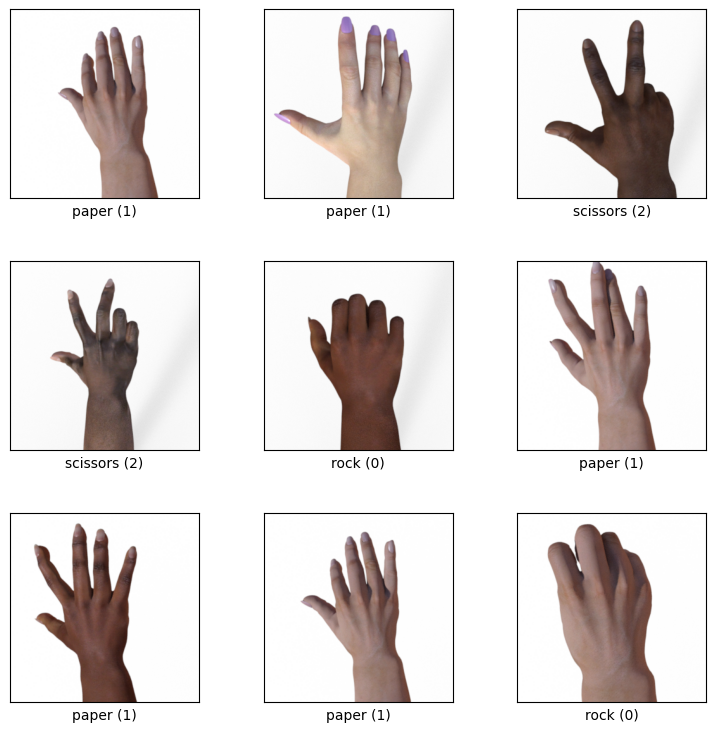

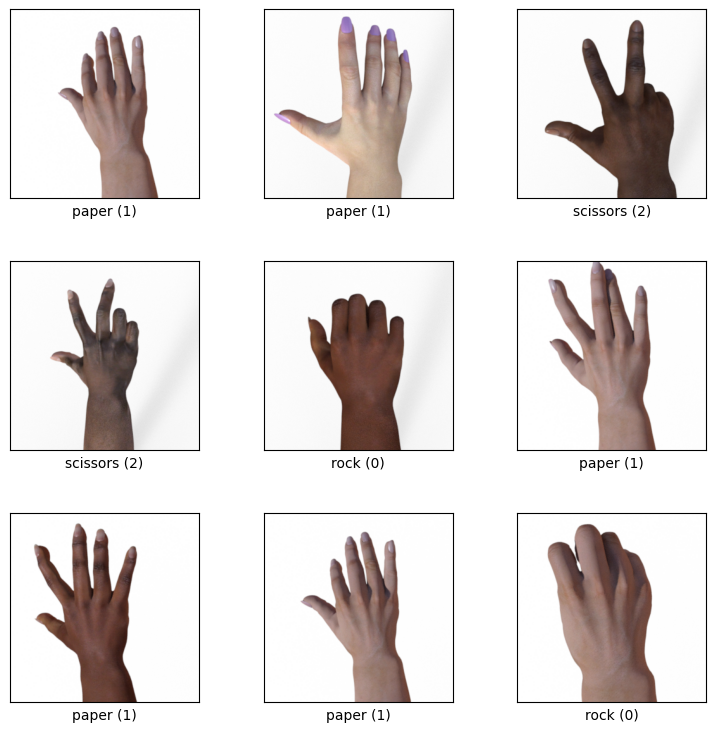

In [4]:
print(df.shape)
display(df.head())  
display(df.describe())
tfds.show_examples(ds_train, ds_info)

***
# Workspace
***

Organization:

These are my three graphing functions rolled into one, so I can easily generate a report on a model.

In [5]:
#graphing functions

#plotting the accuracy and loss
def plot_accuracy_and_loss(history):
    history = history.history
    figure = plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    #print(history.keys())
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='best')
    return figure

#plotting the confusion matrix
def plot_confusion_matrix(cm, class_names):
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return figure

def evaluate_and_plot(model, ds_test, info):
    plot_accuracy_and_loss(model.history)

    y_pred = model.predict(ds_test)
    y_true = np.concatenate([y for _, y in ds_test], axis=0)

    cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
    plot_confusion_matrix(cm, info.features['label'].names)
# Usage:
# evaluate_and_plot(grid_result.best_estimator_, ds_test, info)

In [6]:
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

Model design:

In [16]:
#example model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(300, 300, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6


20/20 [==============================] - 1s 25ms/step - loss: 47223.8906 - sparse_categorical_accuracy: 0.3766 - val_loss: 4141.1343 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/6
20/20 [==============================] - 0s 24ms/step - loss: 1741.6498 - sparse_categorical_accuracy: 0.5345 - val_loss: 1539.4973 - val_sparse_categorical_accuracy: 0.5296
Epoch 3/6
20/20 [==============================] - 0s 23ms/step - loss: 719.7109 - sparse_categorical_accuracy: 0.6655 - val_loss: 1905.7410 - val_sparse_categorical_accuracy: 0.3925
Epoch 4/6
20/20 [==============================] - 0s 23ms/step - loss: 470.1785 - sparse_categorical_accuracy: 0.7357 - val_loss: 3549.5046 - val_sparse_categorical_accuracy: 0.3468
Epoch 5/6
20/20 [==============================] - 0s 22ms/step - loss: 1028.4883 - sparse_categorical_accuracy: 0.6429 - val_loss: 1780.7946 - val_sparse_categorical_accuracy: 0.4812
Epoch 6/6
20/20 [==============================] - 0s 22ms/step - loss: 831.6592 - sparse_c

3/3 [==============================] - 0s 8ms/step


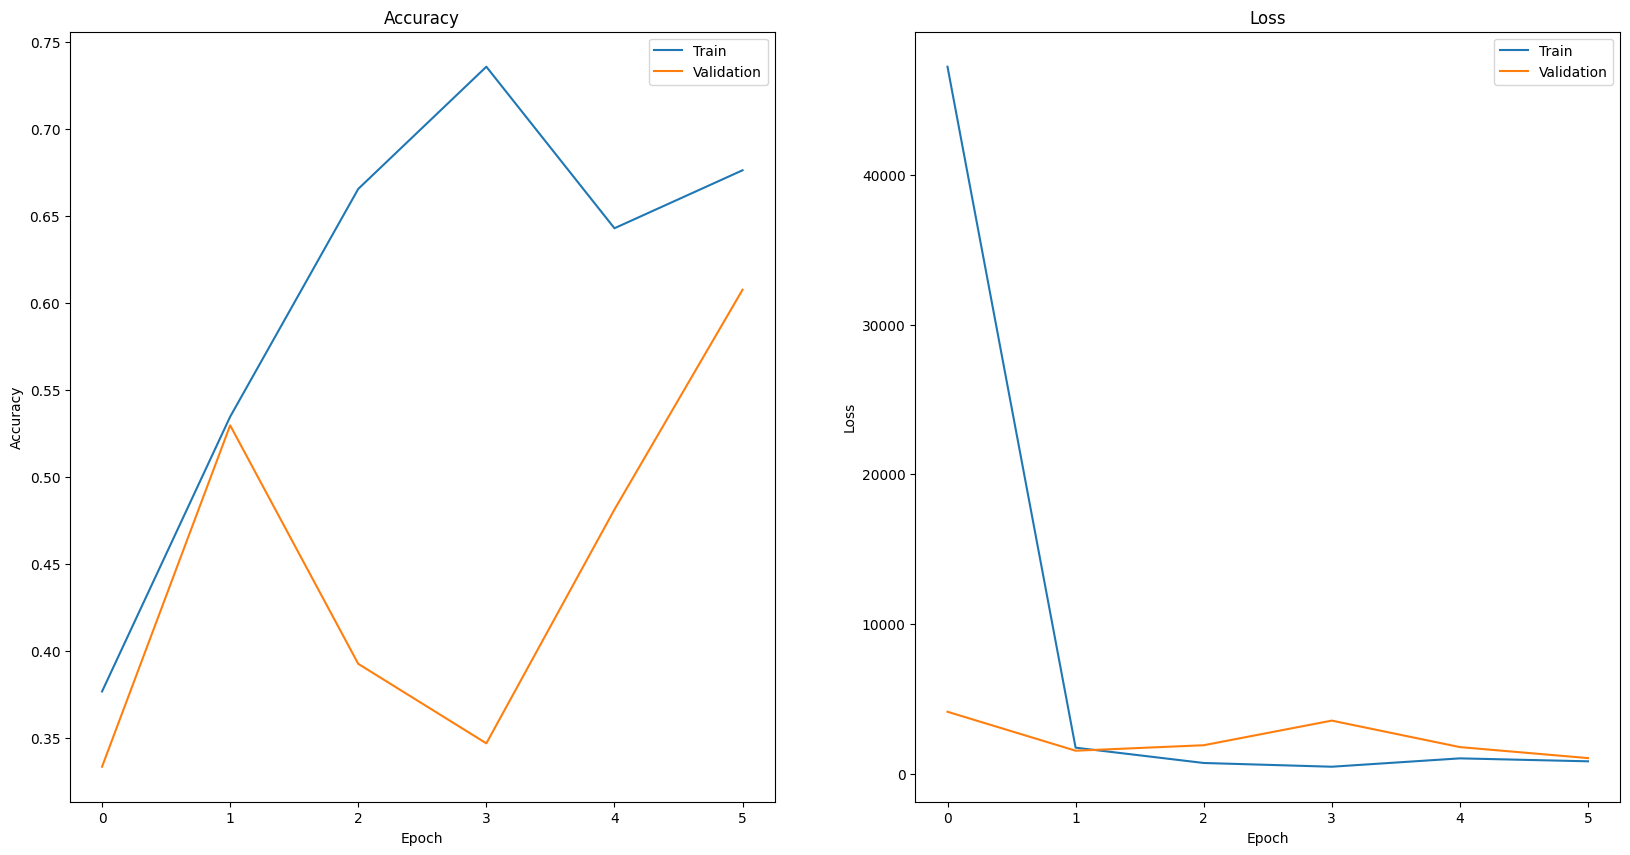

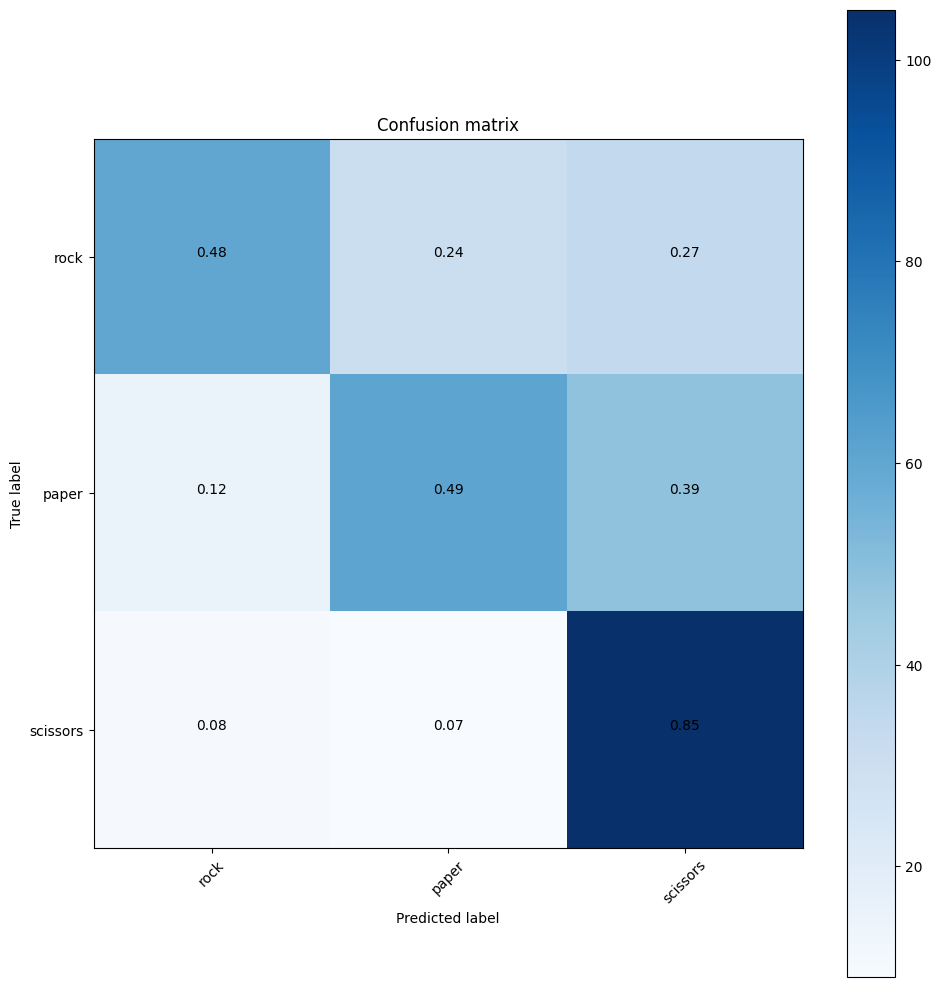

In [17]:
#graphs of example model
evaluate_and_plot(model, ds_test, info)

# Hyperparameters

















I initially tried to use grid search cv, but as far as I can tell it does not work with tensorflow datasets, so I was converting to dataframe. While trouble shooting this, I came across the tensorflow hyperparameter tuning, which I found to be more applicable and useful. 

In [11]:
#parameters (i turn these into HParams later)
HP_NUM_LAYERS = hp.HParam('num_layers', hp.Discrete([1, 2, 3]))
HP_LAYER1 = hp.HParam('layer1', hp.Discrete([128, 256, 512]))
HP_LAYER2 = hp.HParam('layer2', hp.Discrete([64, 128, 256]))
HP_LAYER3 = hp.HParam('layer3', hp.Discrete([64, 128, 256]))

METRIC_ACCURACY = 'sparse_categorical_accuracy'

In [12]:
with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
        hparams=[HP_NUM_LAYERS, HP_LAYER1, HP_LAYER2, HP_LAYER3],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

In [18]:
# model function
def train_test_model(hparams):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(300, 300, 3)),
      tf.keras.layers.Dense(hparams[HP_LAYER1], activation='relu'),
    ])

    if hparams[HP_NUM_LAYERS] > 1:
        model.add(tf.keras.layers.Dense(hparams[HP_LAYER2], activation='relu'))
    if hparams[HP_NUM_LAYERS] > 2:
        model.add(tf.keras.layers.Dense(hparams[HP_LAYER3], activation='relu'))

    #output layer

    model.add(tf.keras.layers.Dense(3))    
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )

    model.fit(
        ds_train,
        epochs=6,
        validation_data=ds_test,
    )
    _, accuracy = model.evaluate(ds_test)

    return accuracy

In [19]:
#running tuning
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [20]:
def grid_search():

    RUN_ID = 0
    for layer1 in HP_LAYER1.domain.values:
        for layer2 in HP_LAYER2.domain.values:
            for layer3 in HP_LAYER3.domain.values:
                for num_layers in HP_NUM_LAYERS.domain.values:
                    hparams = {
                        HP_LAYER1: layer1,
                        HP_LAYER2: layer2,
                        HP_LAYER3: layer3,
                        HP_NUM_LAYERS: num_layers,
                    }
                    run_name = "run-%d" % RUN_ID
                    print('--- Starting trial: %s' % run_name)
                    print({h: hparams[h] for h in hparams})
                    run('logs/hparam_tuning/' + run_name, hparams)
                    RUN_ID += 1

#grid_search() #this takes a very long time to run, and gives a lot of data
# I was moving between collab and my machine, as Tensorboard doesnt work in vscode, and I enjoyed it for exploring results
# the tunes below are the highlights of the grid search

# First Tune

--- Starting trial: run-0

{'activation': 'relu', 'optimizer': 'adam', 'layer1': 128}

Epoch 6/6

20/20 [==============================] - 1s 34ms/step - loss: 180.6780 - sparse_categorical_accuracy: 0.7020 - val_loss: 632.6035 - val_sparse_categorical_accuracy: 0.5188

3/3 [==============================] - 0s 16ms/step - loss: 632.6035 - sparse_categorical_accuracy: 0.5188

--- Starting trial: run-1

{'activation': 'relu', 'optimizer': 'adam', 'layer1': 256}

Epoch 6/6

20/20 [==============================] - 1s 50ms/step - loss: 276.5044 - sparse_categorical_accuracy: 0.8651 - val_loss: 574.1183 - val_sparse_categorical_accuracy: 0.6801

3/3 [==============================] - 0s 20ms/step - loss: 574.1183 - sparse_categorical_accuracy: 0.6801

# Second Tune
--- Starting trial: run-1

{'layer1': 128, 'layer2': 64, 'layer3': 64, 'num_layers': 2}

Epoch 6/6

20/20 [==============================] - 1s 48ms/step - loss: 1122.3218 - sparse_categorical_accuracy: 0.7095 - val_loss: 1278.9666 - val_sparse_categorical_accuracy: 0.6747

3/3 [==============================] - 0s 17ms/step - loss: 1278.9666 - sparse_categorical_accuracy: 0.6747

--- Starting trial: run-7

{'layer1': 128, 'layer2': 64, 'layer3': 256, 'num_layers': 2}

Epoch 6/6

20/20 [==============================] - 1s 48ms/step - loss: 434.0518 - sparse_categorical_accuracy: 0.7861 - val_loss: 667.3186 - val_sparse_categorical_accuracy: 0.6694

3/3 [==============================] - 0s 18ms/step - loss: 667.3186 - sparse_categorical_accuracy: 0.6694

--- Starting trial: run-12

{'layer1': 128, 'layer2': 128, 'layer3': 128, 'num_layers': 1}


20/20 [==============================] - 1s 33ms/step - loss: 703.1422 - sparse_categorical_accuracy: 0.7544 - val_loss: 2543.5942 - val_sparse_categorical_accuracy: 0.5403

Epoch 6/6

20/20 [==============================] - 1s 33ms/step - loss: 614.9320 - sparse_categorical_accuracy: 0.7817 - val_loss: 686.8946 - val_sparse_categorical_accuracy: 0.7097

3/3 [==============================] - 0s 16ms/step - loss: 686.8946 - sparse_categorical_accuracy: 0.7097

--- Starting trial: run-21

{'layer1': 128, 'layer2': 256, 'layer3': 128, 'num_layers': 1}

Epoch 6/6

20/20 [==============================] - 1s 35ms/step - loss: 117.8969 - sparse_categorical_accuracy: 0.8167 - val_loss: 582.0190 - val_sparse_categorical_accuracy: 0.6102

3/3 [==============================] - 0s 20ms/step - loss: 582.0190 - sparse_categorical_accuracy: 0.6102

--- Starting trial: run-24

{'layer1': 128, 'layer2': 256, 'layer3': 256, 'num_layers': 1}

Epoch 6/6

20/20 [==============================] - 1s 33ms/step - loss: 115.3427 - sparse_categorical_accuracy: 0.8516 - val_loss: 637.9283 - val_sparse_categorical_accuracy: 0.6586

3/3 [==============================] - 0s 17ms/step - loss: 637.9283 - sparse_categorical_accuracy: 0.6586

I was curious about what the model excelled at and what it missed, so I examined the data and looked at the confusion matrix. It struggles the most between paper and rock, with scissors being distinct enough. It also tends to lean on rock more than paper.

Epoch 1/6


2023-12-11 12:43:06.376758: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f708bb8dd90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-11 12:43:06.376774: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-12-11 12:43:06.380394: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-11 12:43:06.391456: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1702327386.447672   20180 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - 2s 31ms/step - loss: 57561.5508 - sparse_categorical_accuracy: 0.3313 - val_loss: 13699.7881 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/6
20/20 [==============================] - 0s 23ms/step - loss: 8957.6904 - sparse_categorical_accuracy: 0.3730 - val_loss: 8315.7363 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/6
20/20 [==============================] - 0s 22ms/step - loss: 2628.6069 - sparse_categorical_accuracy: 0.4694 - val_loss: 2290.6174 - val_sparse_categorical_accuracy: 0.4516
Epoch 4/6
20/20 [==============================] - 0s 23ms/step - loss: 921.7148 - sparse_categorical_accuracy: 0.6171 - val_loss: 1036.2700 - val_sparse_categorical_accuracy: 0.5161
Epoch 5/6
20/20 [==============================] - 0s 23ms/step - loss: 399.7889 - sparse_categorical_accuracy: 0.7135 - val_loss: 888.1402 - val_sparse_categorical_accuracy: 0.6183
Epoch 6/6
3/3 [==============================] - 0s 8ms/step


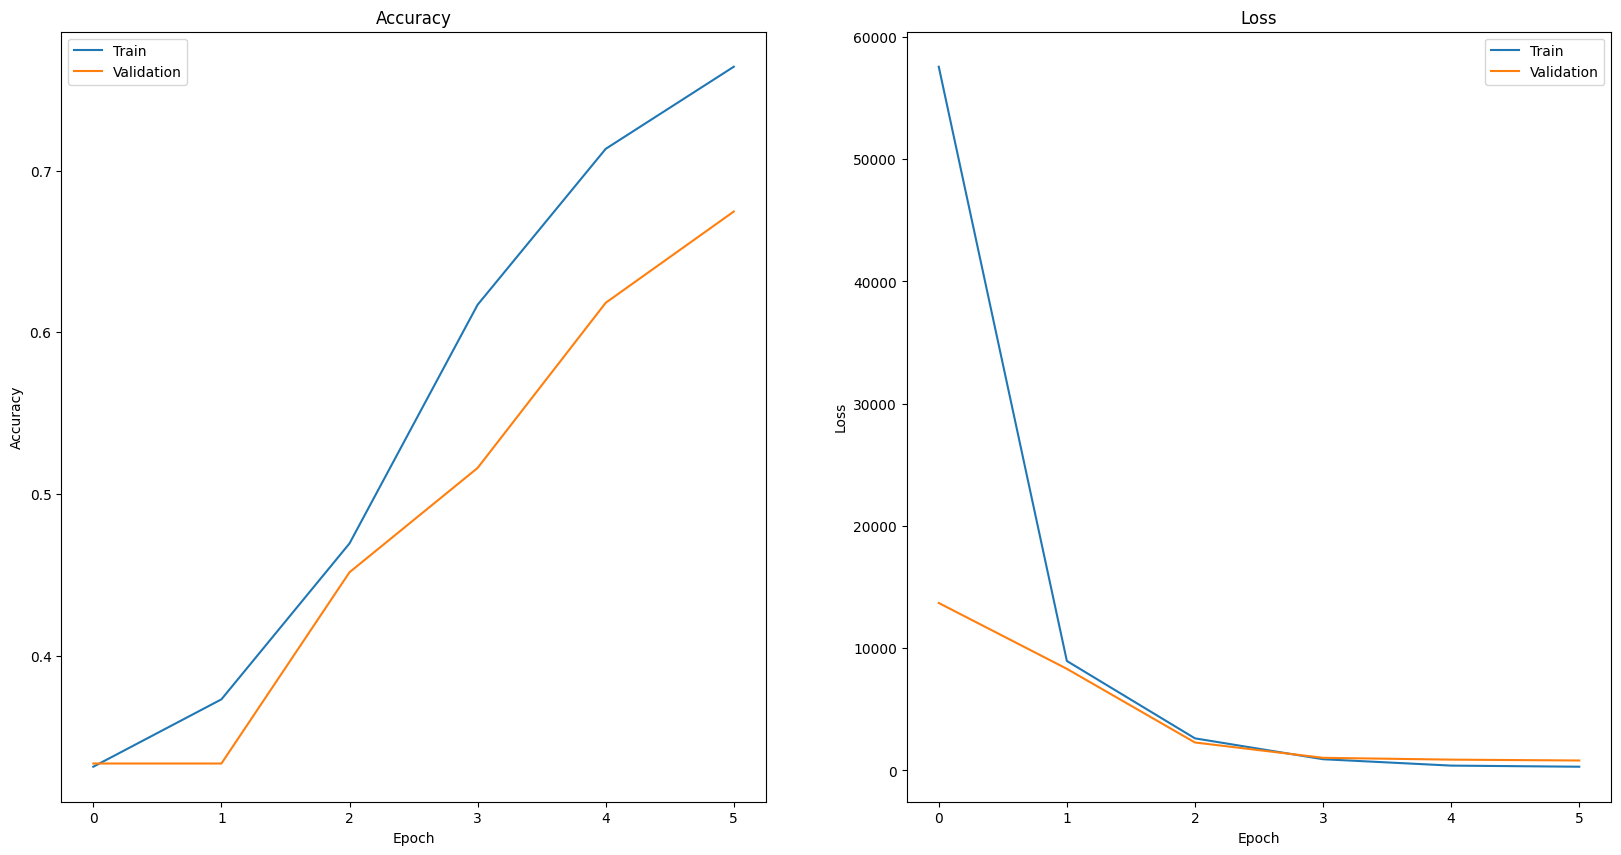

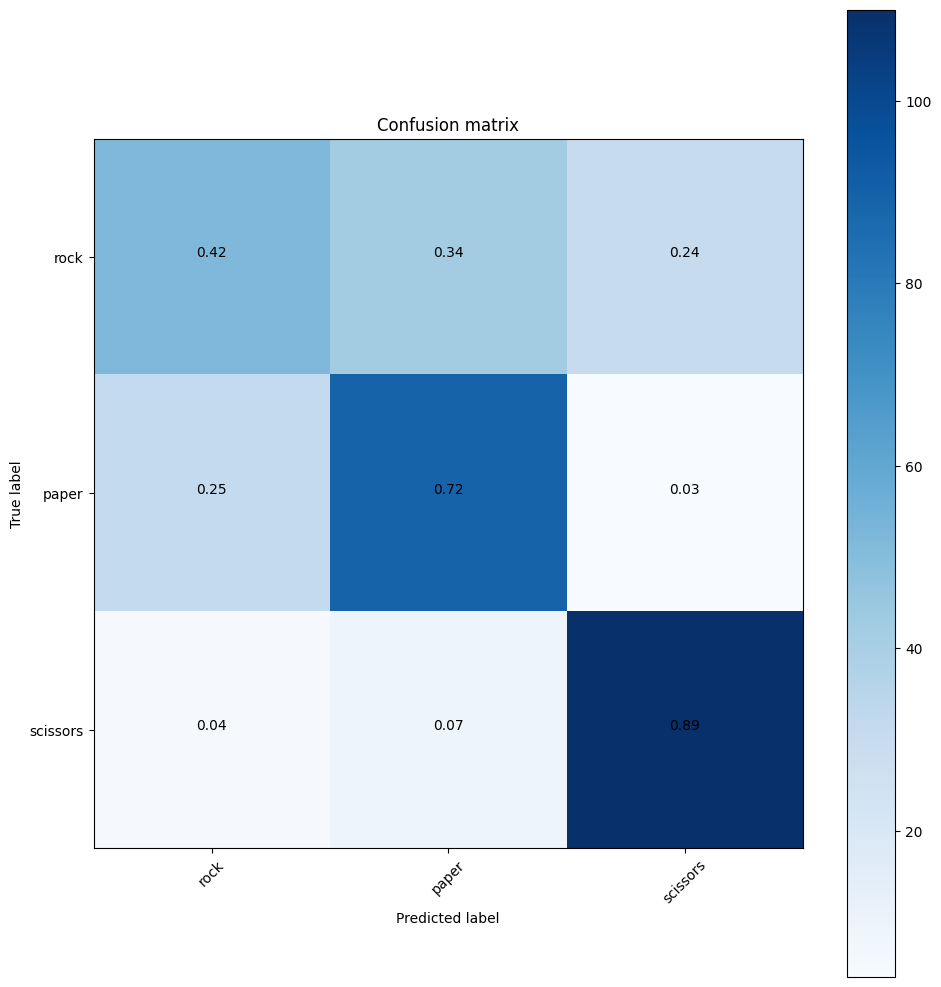

In [8]:
#this adds a softmax layer to the model to make it a probability distribution
#and uses the 1 layer 128 node model from tune 2
pmodel = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(300, 300, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

pmodel.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

pmodel.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

#graphs of pmodel
evaluate_and_plot(pmodel, ds_test, info)

1/1 [==============================] - 0s 12ms/step
Actual label: scissors
Predicted label: scissors
Correct :) :) :) :) :)


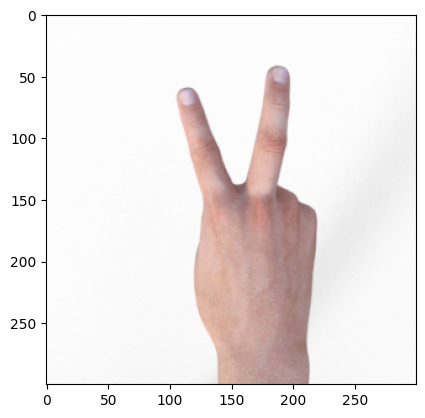

1/1 [==============================] - 0s 13ms/step
Actual label: paper
Predicted label: paper
Correct :) :) :) :) :)


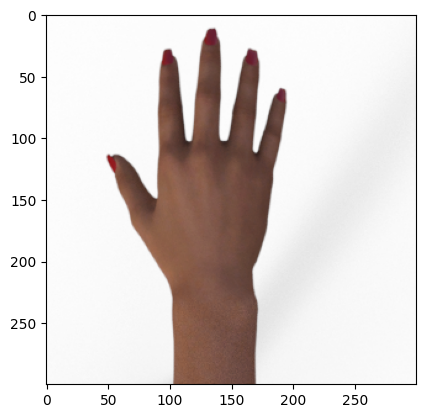

1/1 [==============================] - 0s 14ms/step
Actual label: scissors
Predicted label: scissors
Correct :) :) :) :) :)


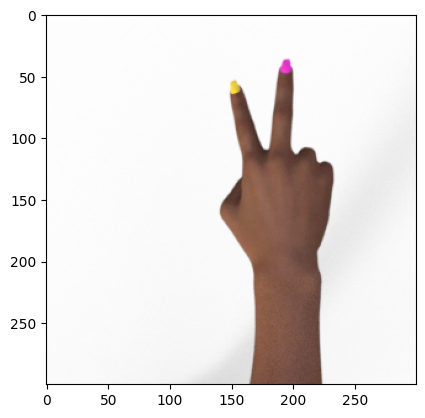

1/1 [==============================] - 0s 13ms/step
Actual label: rock
Predicted label: rock
Correct :) :) :) :) :)


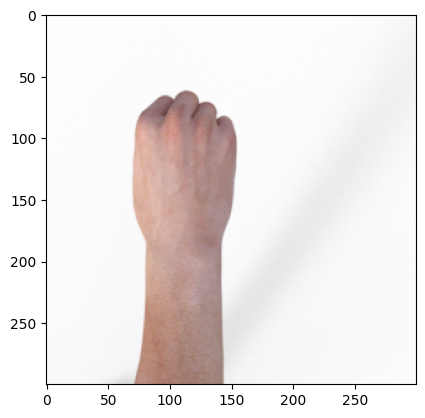

1/1 [==============================] - 0s 13ms/step
Actual label: rock
Predicted label: scissors
Incorrect <===================


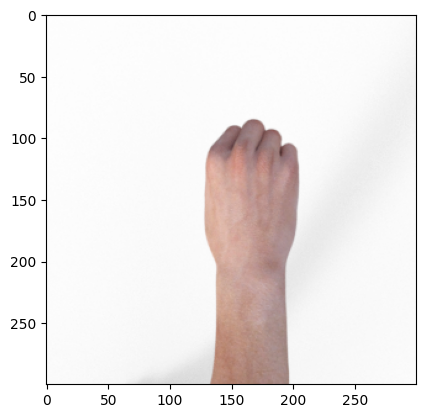

1/1 [==============================] - 0s 14ms/step
Actual label: rock
Predicted label: rock
Correct :) :) :) :) :)


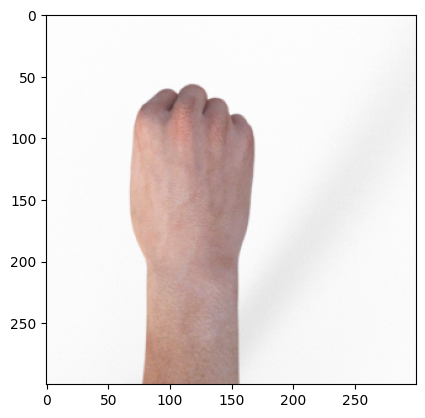

1/1 [==============================] - 0s 13ms/step
Actual label: paper
Predicted label: paper
Correct :) :) :) :) :)


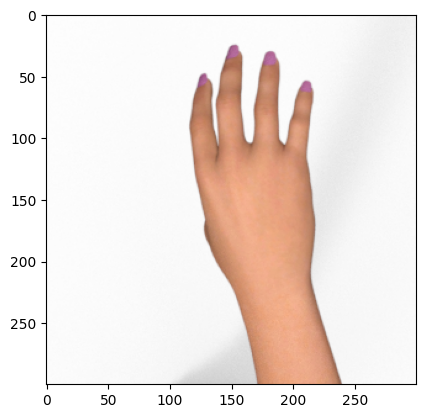

1/1 [==============================] - 0s 12ms/step
Actual label: paper
Predicted label: paper
Correct :) :) :) :) :)


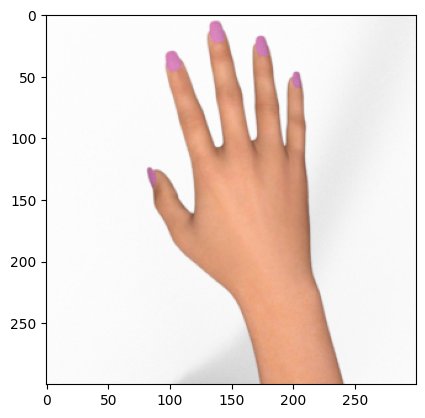

1/1 [==============================] - 0s 23ms/step
Actual label: scissors
Predicted label: scissors
Correct :) :) :) :) :)


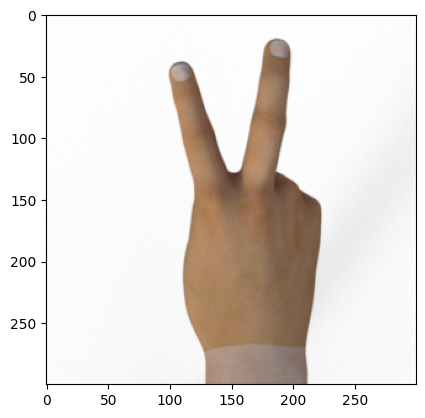

1/1 [==============================] - 0s 13ms/step
Actual label: paper
Predicted label: paper
Correct :) :) :) :) :)


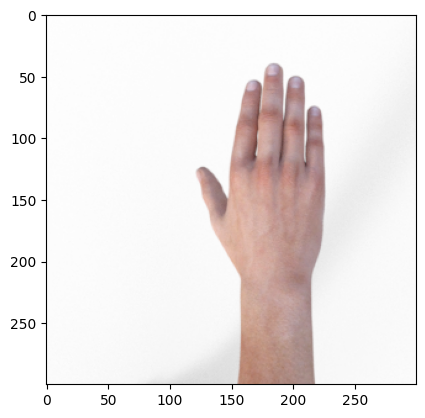

In [15]:
def rps(number):
    if number == 0:
        return "rock"
    elif number == 1:
        return "paper"
    elif number == 2:
        return "scissors"
    else:
        return "error"

def check_image(image, label):
    # Convert image to numpy array
    image = image.numpy()

    # Make predictions
    predictions = pmodel.predict(tf.expand_dims(image, axis=0))
    predicted_label = np.argmax(predictions)

    print("Actual label:", rps(label.numpy()))
    print("Predicted label:", rps(predicted_label))
    if label == predicted_label:
        print("Correct :) :) :) :) :)")
    else:
        print("Incorrect <===================")
    plt.imshow(image)
    plt.show()

def check_images(ds, num=10):
    ds = ds.unbatch().batch(1)
    for image, label in ds.take(num):
        check_image(image[0], label)

check_images(ds_test)

# Ethics:

I was not super able to test skin color differences, (as this is the most common bias in machine learning,) but there appeared to be some. What I did notive was a HUGE right hand bias. I had originally taken my photos of my left hand, using my right for the camera, and all of my classifications were wrong! Sure enough, after flipping horizontally, my accuracy went up a ton! It even was able to recognize my hand without editing out the background, though not as well as on a plain white BG. 

This was super interesting to see! There would be a easy way to just flip every image and see which predicition had a hgiher confidence, as a work around.

## Experiment(s)

Now that we have a tuned model I wanted to see if it was any good at predicting real images. First I took some photos of my own hand on a relatively noisy background, and then on a white background, and then on an edited white background.

1/1 [==============================] - 0s 29ms/step
Predicted label: scissors
Actual label: scissors
Correct :) :) :) :) :)


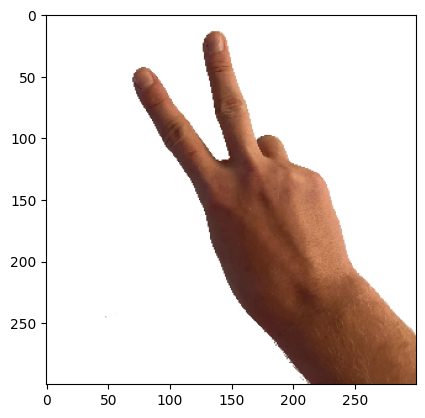

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 29ms/step
Predicted label: rock
Actual label: rock
Correct :) :) :) :) :)


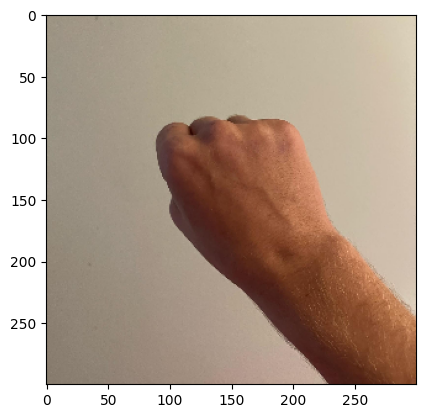

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 22ms/step
Predicted label: paper
Actual label: paper
Correct :) :) :) :) :)


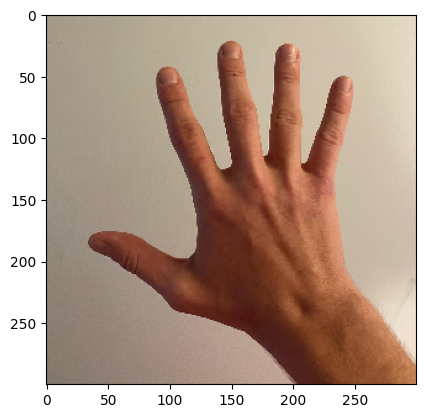

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 22ms/step
Predicted label: scissors
Actual label: paper
Incorrect <===================


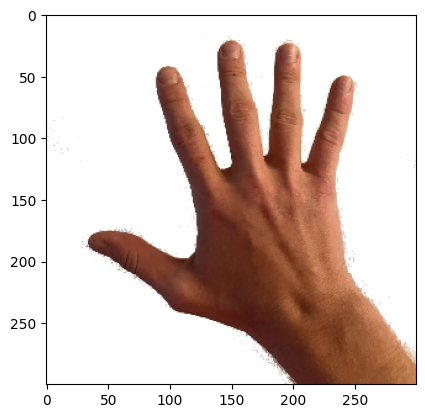

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 31ms/step
Predicted label: rock
Actual label: rock
Correct :) :) :) :) :)


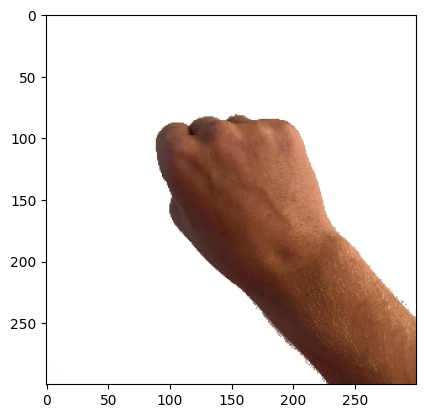

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 26ms/step
Predicted label: scissors
Actual label: scissors
Correct :) :) :) :) :)


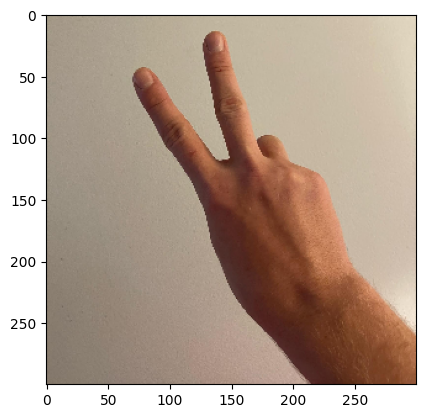

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 26ms/step
Predicted label: scissors
Actual label: dog.jpeg
Incorrect <===================


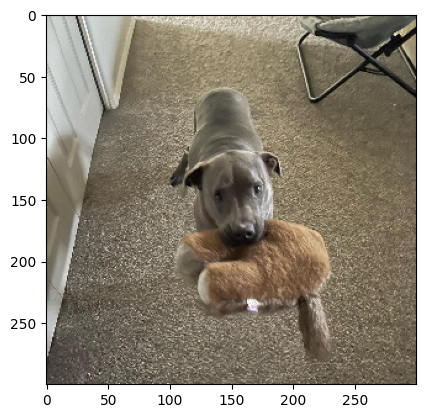

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 20ms/step
Predicted label: scissors
Actual label: paper
Incorrect <===================


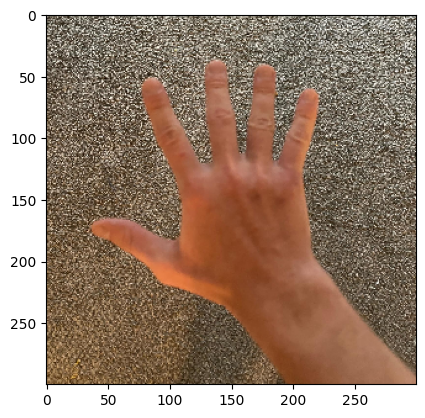

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 31ms/step
Predicted label: scissors
Actual label: rock
Incorrect <===================


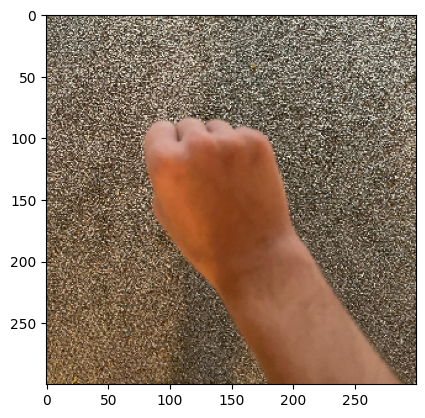

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 



1/1 [==============================] - 0s 24ms/step
Predicted label: scissors
Actual label: scissors
Correct :) :) :) :) :)


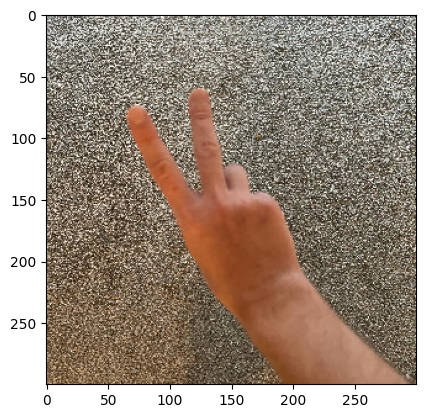

 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 





In [31]:
#load my images from dir
directory = "./cimages/"

for  filename in os.listdir(directory):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        image = tf.keras.preprocessing.image.load_img(
            os.path.join(directory, filename), grayscale=False, color_mode="rgb", target_size=(300, 300),
            interpolation="nearest"
        )
        #image = image.rotate(-90)
        #flip horizontally cus model is bad at left hands
        image = tf.image.flip_left_right(image)
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])  # Convert single image to a batch.
        predictions = pmodel.predict(input_arr)
        predicted_label = np.argmax(predictions)
        print("Predicted label: " + info.features['label'].names[predicted_label])
        #actual label is in the filename split at _
        actual_label = filename.split("_")[0]
        print("Actual label: " + actual_label)
        if actual_label == info.features['label'].names[predicted_label]:
            print("Correct :) :) :) :) :)")
        else:
            print("Incorrect <===================")
        plt.imshow(image)
        plt.show()

        print(" -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- \n\n\n")
        continue
    else:
        continue

***

# Report

***

### Expectations

# RPS DL AI FTW GG

## Intro

In this notebook I trained a sequential Keras model on a flattened image dataset. This may not have been the most effective for classification, but I was shocked at how well it worked with minimal layers and a high density! My model was unstable though, with different runs performing vastly differently. I attribute this to the batching, and shuffling. Depending on how the initial epochs went, the model would be able to generalize to the validation set.

## Dataset

The dataset, rock_paper_scissors, is a high quality, edited, dataset. The photos skew heavily (if not exclusively) right handed. They also have a plain white background with some shadowing. This allowed minimal preprocessing, although to generalize to new images I did resize them down. It is also interesting to note that the model is veiwing each color channel as a sequential array, probably allowing it to weigh different colors well.

I had originally been gunning towards larger datasets, but I was unable to run them on less than 16 GB of RAM, which is greater than Collab, and also greater than my PC when I have Chrome open (I should use a more efficient browser!). Even this dataset was somewhat crashy when runing many models for tuning.

## Methods

I relied heavily on tuning. While a relu activation should have been deducable, I did also test a tanh. Besides that, I found I needed less layers, no dropout, and relativly dense layers. This is likely due to the high density of the input, a 900 value long array (after flattening). I was not able to do much better than my example model, which was slightly dissapoinying.

Once I had reached an acceptable level of accuracy, I wanted to generalize. I used photos of my0
1 own hand, imagining some sort of game playing AI that would take shots of a video stream. The accuracy was hit an miss on that sort of example, which were labeled the 'bad' images. My medium quality images were just taken on a white background, instead of a carpet. They did alright. For the easiest task, I edited the background to pure white, reflecting the test set.

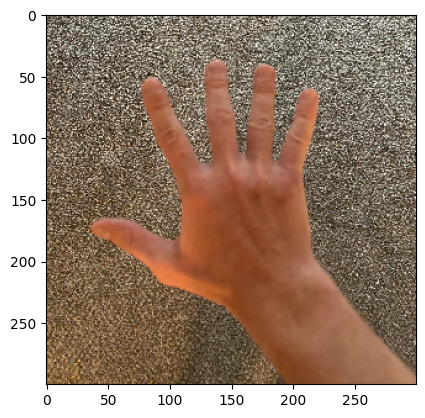

## Results

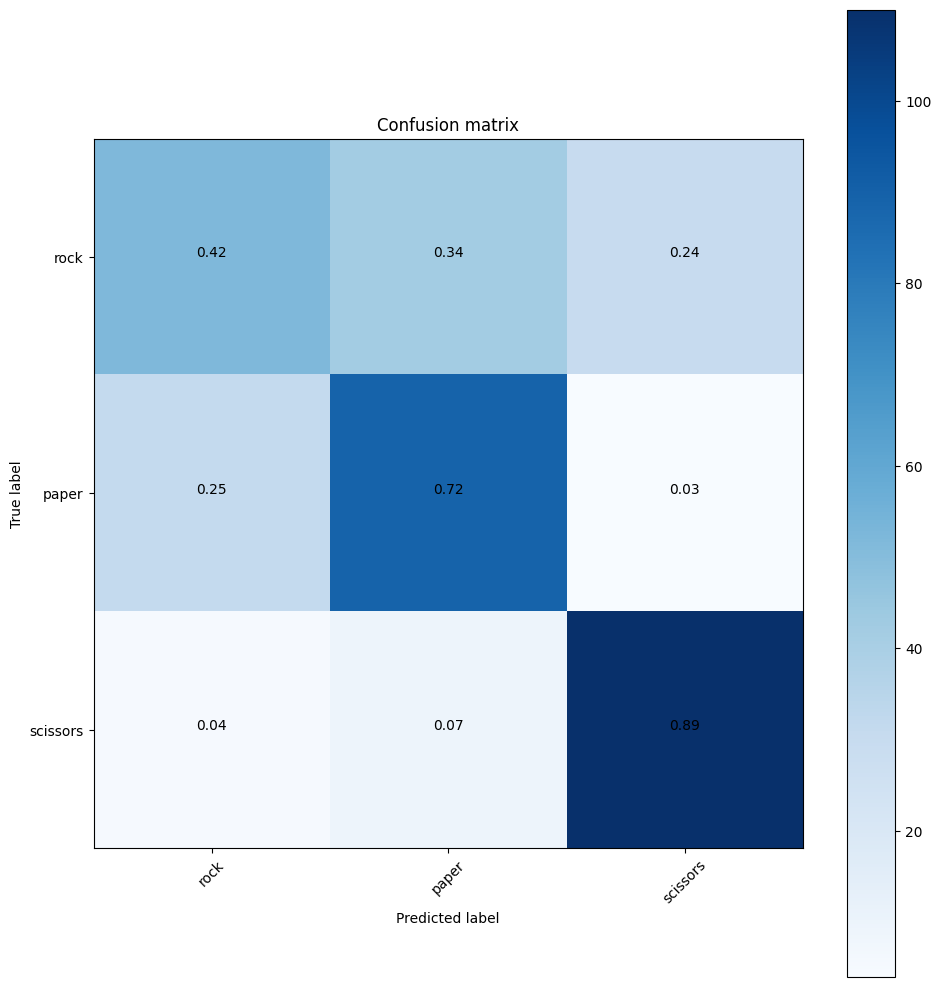

As stated earlier, there was some randomness to my models. Despite that, I was able to achieve a pleasing result! I was able to get up to 70% on my validation, 80% on my test, which is somewhat diminshed by the fact that random guessing would get 33.33%. It is somewhat annoying that left hands are almost unrecognizable, but a simple flip can fix that. Beyond that, I would have asuumed that rock would be easier than paper vs scissors, which both have extended phalanges. Contrary to that, the model was heavily scissors biased, and confused rock and paper often.

## Discussion

I believe that this model could benefit from a more realistic set of images, with more variation in lighting, background, and hand position. To apply it, I think it could be a fun challenge to play against this AI in a variation of RPS, wherein you have to hold your hand in a position it can read before the time runs out. This would be a fun way to test the model, and also a different way to play RPS, with a challenge of making yourself readable, instead of trying to guess your opponents move, which would be given immediately.

## Sources:
I worked of of the tensorflow docs directly, with these two examples being the most helpful:
https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/hyperparameter_tuning_with_hparams.ipynb#scrollTo=Xf4KM-U2bbP_
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb#scrollTo=DnfNA0CrQLSD